## Environment

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git@main
!pip install evaluate gensim

  Cloning https://github.com/huggingface/transformers.git (to revision main) to /tmp/pip-req-build-ba_emsm4
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-ba_emsm4
  Resolved https://github.com/huggingface/transformers.git to commit 24807bfcf4a21286fa2a7e728f381ddaaca7bbc7
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 534.5/534.5 kB 18.7 MB/s eta 0:00:00
  Created wheel for transformers: filename=transformers-5.0.0.dev0-py3-none-any.whl size=11155139 sha256=a67a15808376bc6a0823763803146bb4d52547d922e70d2daae7659ad3c4c9ea
  Stored in directory: /tmp/pip-ephem-wheel-cache-9b_dvhrv/wheels/12/51/df/b62c8ce0479c5de6f7bef121169b3e946949a57481169d3155
Successfully built transformers
  Attempting uninstall: huggingface-hub
    Found existing installation: huggingface-hub 0.36.0
    Uninsta

## Load Data

In [ ]:
from datasets import load_dataset
from collections import Counter

dataset = load_dataset("flaviagiammarino/path-vqa")

train_val_answers = []
for split in ['train', 'validation']:
    train_val_answers.extend(dataset[split]['answer'])

answer_counts = Counter(train_val_answers)

MIN_FREQUENCY = 9
unique_answers = sorted([ans for ans, count in answer_counts.items() if count >= MIN_FREQUENCY])

label2id = {label: idx for idx, label in enumerate(unique_answers)}
id2label = {idx: label for label, idx in label2id.items()}

NUM_LABELS = len(unique_answers)

print(len(answer_counts))
print(f">= {MIN_FREQUENCY}): {NUM_LABELS}")

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md: 0.00B [00:00, ?B/s]

data/train-00000-of-00007-f2d0e9ef9f022d(…):   0%|          | 0.00/42.8M [00:00<?, ?B/s]

data/train-00001-of-00007-47d8e0220bf6c9(…):   0%|          | 0.00/81.0M [00:00<?, ?B/s]

data/train-00002-of-00007-7fb5037c4c5da7(…):   0%|          | 0.00/104M [00:00<?, ?B/s]

data/train-00003-of-00007-74b9b7b81cc55f(…):   0%|          | 0.00/90.0M [00:00<?, ?B/s]

data/train-00004-of-00007-77eea90af4a55d(…):   0%|          | 0.00/46.1M [00:00<?, ?B/s]

data/train-00005-of-00007-5332ec423be520(…):   0%|          | 0.00/55.8M [00:00<?, ?B/s]

data/train-00006-of-00007-637a58c700b604(…):   0%|          | 0.00/57.3M [00:00<?, ?B/s]

data/validation-00000-of-00003-90a5518d2(…):   0%|          | 0.00/41.3M [00:00<?, ?B/s]

data/validation-00001-of-00003-cbfe947a3(…):   0%|          | 0.00/45.7M [00:00<?, ?B/s]

data/validation-00002-of-00003-9ec816895(…):   0%|          | 0.00/64.7M [00:00<?, ?B/s]

data/test-00000-of-00003-e9adadb4799f44d(…):   0%|          | 0.00/41.2M [00:00<?, ?B/s]

data/test-00001-of-00003-7ea98873fc91981(…):   0%|          | 0.00/45.3M [00:00<?, ?B/s]

data/test-00002-of-00003-162830843501982(…):   0%|          | 0.00/69.8M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/19654 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6259 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/6719 [00:00<?, ? examples/s]

4039
>= 9): 127


In [ ]:
print(label2id)

{'1': 0, 'abdomen': 1, 'acute myelogenous leukemia': 2, 'adenocarcinoma': 3, 'adrenal': 4, 'amyloidosis': 5, 'anencephaly': 6, 'aorta': 7, 'atherosclerosis': 8, 'atrophy': 9, 'basilar skull fracture': 10, 'bilateral cleft palate': 11, 'blood': 12, 'bone': 13, 'bone marrow': 14, 'bone, calvarium': 15, 'brain': 16, 'breast': 17, 'candida in peripheral blood': 18, 'carcinoma': 19, 'cardiovascular': 20, 'chromophobe adenoma': 21, 'chronic myelogenous leukemia': 22, 'colon': 23, 'conjoined twins cephalothoracopagus janiceps': 24, 'coronary artery': 25, 'cortical nodule': 26, 'endocrine': 27, 'endocrine system': 28, 'esophagus': 29, 'extremities': 30, 'eye': 31, 'face': 32, 'feet': 33, 'female reproductive': 34, 'female reproductive system': 35, 'fever': 36, 'fixed tissue': 37, 'foot': 38, 'gangrene': 39, 'gastrointestinal': 40, 'gastrointestinal system': 41, 'gaucher cell': 42, 'good': 43, 'gout': 44, 'hand': 45, 'heart': 46, 'hematologic': 47, 'hepatobiliary': 48, 'hodgkins disease': 49, '

## Data Preprocessing

In [ ]:
from transformers import AutoImageProcessor
import gensim.downloader as api
import torch

glove_model = api.load("glove-wiki-gigaword-300")

pad_token = "<pad>"
unk_token = "<unk>"

glove_vectors = torch.tensor(glove_model.vectors)

pad_vector = torch.zeros(1, 300)
unk_vector = torch.randn(1, 300)

pretrained_embeddings = torch.cat((pad_vector, unk_vector, glove_vectors), dim=0)

word2idx = {word: idx + 2 for word, idx in glove_model.key_to_index.items()}
word2idx[pad_token] = 0
word2idx[unk_token] = 1

vocab_size = len(word2idx)
print(f"GloVe loaded. New Vocab Size: {vocab_size}")

image_processor = AutoImageProcessor.from_pretrained("microsoft/resnet-50")

def simple_tokenizer(text, max_length=32):
    tokens = text.lower().replace("?", " ?").replace(".", " .").split()

    ids = [word2idx.get(token, word2idx[unk_token]) for token in tokens]

    if len(ids) > max_length:
        ids = ids[:max_length]

    padding_length = max_length - len(ids)
    if padding_length > 0:
        ids = ids + [0] * padding_length

    return ids

def transform_fn(batch):
    images = [img.convert("RGB") for img in batch['image']]
    image_inputs = image_processor(images=images, return_tensors="pt")

    input_ids_list = [simple_tokenizer(q) for q in batch['question']]
    input_ids = torch.tensor(input_ids_list, dtype=torch.long)

    labels = []
    for ans in batch['answer']:
        labels.append(label2id.get(ans, -100))

    return {
        "pixel_values": image_inputs.pixel_values,
        "input_ids": input_ids,
        "labels": torch.tensor(labels, dtype=torch.long)
    }

dataset = dataset.with_transform(transform_fn)

[==================================================] 100.0% 376.1/376.1MB downloaded
GloVe loaded. New Vocab Size: 400002


preprocessor_config.json:   0%|          | 0.00/266 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


## Model

In [ ]:
import torch
import torch.nn as nn
from transformers import AutoModel
from transformers.modeling_outputs import SequenceClassifierOutput

class CNN_LSTM_VQA(nn.Module):

    def __init__(self, pretrained_embeddings, num_answers=1000):
        super().__init__()

        # ResNet-50
        self.resnet = AutoModel.from_pretrained("microsoft/resnet-50")
        self.visual_dim = 2048

        # LSTM
        vocab_size, embedding_dim = pretrained_embeddings.shape
        self.embedding = nn.Embedding.from_pretrained(
            pretrained_embeddings,
            freeze=False,
            padding_idx=0
        )
        self.lstm = nn.LSTM(input_size=300, hidden_size=512, batch_first=True)

        # Classifier
        self.classifier = nn.Sequential(
            nn.Linear(self.visual_dim + 512, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_answers)
        )

        self.loss_fct = nn.CrossEntropyLoss()

    def forward(self, pixel_values, input_ids, labels=None):
        # Vision
        vision_outputs = self.resnet(pixel_values=pixel_values)
        image_features = vision_outputs.pooler_output.squeeze(-1).squeeze(-1)

        # Text
        embeddings = self.embedding(input_ids)
        _, (hidden, _) = self.lstm(embeddings)
        text_features = hidden[-1]

        combined_features = torch.cat((image_features, text_features), dim=1)
        logits = self.classifier(combined_features)

        loss = None
        if labels is not None:
            loss = self.loss_fct(logits, labels)

        return SequenceClassifierOutput(
            loss=loss,
            logits=logits
        )

## Evaluate

In [ ]:
import evaluate
import numpy as np

squad_metric = evaluate.load("squad")
bleu_metric = evaluate.load("bleu")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=1)

    pred_strs = [id2label[p] for p in predictions]
    label_strs = [id2label[l] if l != -100 else "<unk>" for l in labels]

    yes_no_indices = []
    open_indices = []

    for i, label in enumerate(label_strs):
        if label.lower() in ['yes', 'no']:
            yes_no_indices.append(i)
        else:
            open_indices.append(i)

    results = {
        "yes_no_accuracy": 0.0,
        "open_exact_match": 0.0,
        "open_f1_macro": 0.0,
        "open_bleu_1": 0.0,
        "open_bleu_2": 0.0,
        "open_bleu_3": 0.0
    }

    # Yes/No Accuracy
    if len(yes_no_indices) > 0:
        yn_preds = predictions[yes_no_indices]
        yn_labels = labels[yes_no_indices]
        results["yes_no_accuracy"] = (yn_preds == yn_labels).mean()

    # Open-ended Metrics
    if len(open_indices) > 0:
        open_pred_strs = [pred_strs[i] for i in open_indices]
        open_label_strs = [label_strs[i] for i in open_indices]

        # Accuracy and F1 (SQuAD style)
        squad_preds = []
        squad_refs = []

        for idx, (pred, label) in enumerate(zip(open_pred_strs, open_label_strs)):
            temp_id = str(idx)
            squad_preds.append({"id": temp_id, "prediction_text": pred})
            squad_refs.append({"id": temp_id, "answers": {"text": [label], "answer_start": [0]}})

        squad_results = squad_metric.compute(predictions=squad_preds, references=squad_refs)
        results["open_exact_match"] = squad_results["exact_match"]
        results["open_f1_macro"] = squad_results["f1"]

        # BLEU Scores
        bleu_refs = [[l] for l in open_label_strs]
        for order in [1, 2, 3]:
            try:
                key = f"open_bleu_{order}"
                score = bleu_metric.compute(predictions=open_pred_strs, references=bleu_refs, max_order=order)
                results[key] = score["bleu"]
            except:
                results[key] = 0.0

    return results

## Train

In [ ]:
from transformers import Trainer, TrainingArguments, default_data_collator

model = CNN_LSTM_VQA(pretrained_embeddings=pretrained_embeddings, num_answers=NUM_LABELS)

training_args = TrainingArguments(
    output_dir="./path_vqa_resnet_lstm",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=1e-4,
    remove_unused_columns=False,
    logging_steps=50,
    fp16=torch.cuda.is_available(),
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset['train'],
    eval_dataset=dataset['validation'],
    data_collator=default_data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Loading weights:   0%|          | 0/318 [00:00<?, ?it/s]

ResNetModel LOAD REPORT from: microsoft/resnet-50
Key                 | Status     |  | 
--------------------+------------+--+-
classifier.1.bias   | UNEXPECTED |  | 
classifier.1.weight | UNEXPECTED |  | 

Notes:
- UNEXPECTED	:can be ignored when loading from different task/architecture; not ok if you expect identical arch.


Epoch,Training Loss,Validation Loss,Yes No Accuracy,Open Exact Match,Open F1 Macro,Open Bleu 1,Open Bleu 2,Open Bleu 3
1,1.883302,1.826281,0.545280,7.083599,7.083599,0.026682,0.000000,0.000000
2,1.695097,1.651509,0.546880,12.507977,12.774942,0.056185,0.042947,0.059100
3,1.326459,1.417732,0.784960,15.826420,16.228462,0.081468,0.070861,0.089634
4,1.164433,1.349336,0.786240,17.772814,18.315252,0.089327,0.085195,0.117278
5,1.029156,1.321469,0.811840,18.091895,18.632206,0.094639,0.086437,0.117886


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))
/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


TrainOutput(global_step=6145, training_loss=1.546650538122489, metrics={'train_runtime': 3711.1389, 'train_samples_per_second': 26.48, 'train_steps_per_second': 1.656, 'total_flos': 0.0, 'train_loss': 1.546650538122489, 'epoch': 5.0})

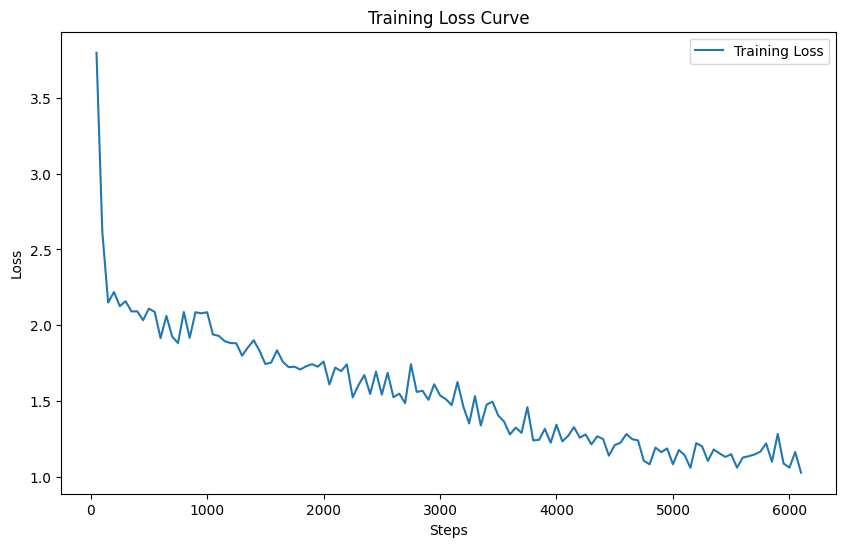

In [ ]:
import matplotlib.pyplot as plt

history = trainer.state.log_history

train_loss = [x['loss'] for x in history if 'loss' in x]
steps = [x['step'] for x in history if 'loss' in x]

plt.figure(figsize=(10, 6))
plt.plot(steps, train_loss, label='Training Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.legend()
plt.show()

## Test

In [ ]:
test_dataset = dataset['test'].with_transform(transform_fn)

print("Test")

test_output = trainer.predict(test_dataset)

for key, value in test_output.metrics.items():
    print(f"{key}: {value:.4f}")

Test


/usr/local/lib/python3.12/dist-packages/PIL/TiffImagePlugin.py:950: UserWarning: Truncated File Read
  warnings.warn(str(msg))


test_loss: 1.2529
test_yes_no_accuracy: 0.7965
test_open_exact_match: 19.2136
test_open_f1_macro: 19.7339
test_open_bleu_1: 0.1026
test_open_bleu_2: 0.1071
test_open_bleu_3: 0.1439
test_runtime: 157.1746
test_samples_per_second: 42.7490
test_steps_per_second: 2.6720


## Examples

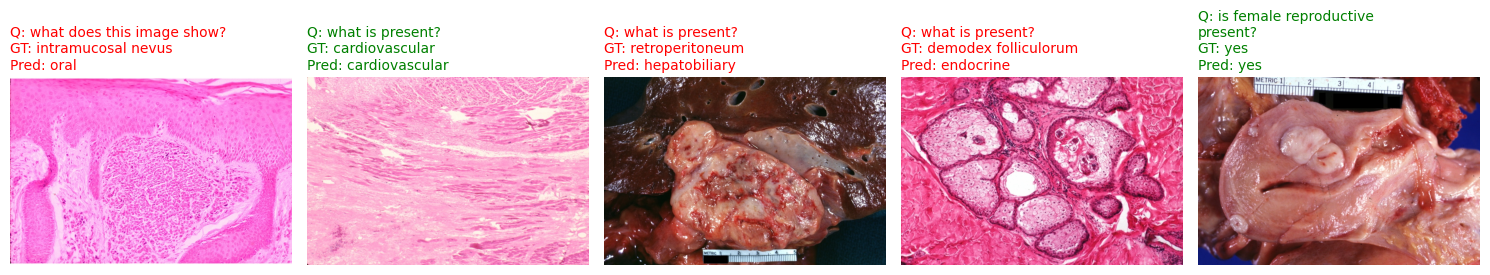

In [ ]:
import matplotlib.pyplot as plt
import torch
import random
import textwrap
from PIL import Image

def show_test_examples_glove(model, image_processor, dataset, id2label, word2idx, num_samples=4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    model.eval()

    indices = random.sample(range(len(dataset)), num_samples)

    fig, axes = plt.subplots(1, num_samples, figsize=(15, 6))
    if num_samples == 1: axes = [axes]

    for i, idx in enumerate(indices):
        item = dataset[idx]
        image_raw = item['image'].convert("RGB")
        question = item['question']
        ground_truth = item['answer']

        image_inputs = image_processor(images=image_raw, return_tensors="pt")
        pixel_values = image_inputs.pixel_values.to(device)

        tokens = question.lower().replace("?", " ?").replace(".", " .").split()

        unk_id = word2idx.get("<unk>", 1)
        pad_id = word2idx.get("<pad>", 0)
        ids = [word2idx.get(t, unk_id) for t in tokens]

        max_length = 32
        if len(ids) > max_length:
            ids = ids[:max_length]
        else:
            ids = ids + [pad_id] * (max_length - len(ids))

        input_ids = torch.tensor([ids], dtype=torch.long).to(device)

        with torch.no_grad():
            outputs = model(pixel_values=pixel_values, input_ids=input_ids)
            logits = outputs.logits
            pred_idx = logits.argmax(dim=1).item()

        pred_answer = id2label[pred_idx]

        ax = axes[i]
        ax.imshow(image_raw)
        ax.axis("off")

        color = "green" if pred_answer == ground_truth else "red"

        wrapped_question = "\n".join(textwrap.wrap(f"Q: {question}", width=30))
        title_text = f"{wrapped_question}\nGT: {ground_truth}\nPred: {pred_answer}"

        ax.set_title(title_text, fontsize=10, color=color, loc='left')

    plt.tight_layout()
    plt.show()

from datasets import load_dataset

raw_dataset = load_dataset("flaviagiammarino/path-vqa", split="test")

show_test_examples_glove(
    model=model,
    image_processor=image_processor,
    dataset=raw_dataset,
    id2label=id2label,
    word2idx=word2idx,
    num_samples=5
)